In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("./file.csv")
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [33]:
df.shape

(52955, 21)

In [34]:
df.isna().sum()

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [35]:
df["Coupon_Code"] = df["Coupon_Code"].fillna(0)
df["Discount_pct"] = df["Discount_pct"].fillna(0)
df = df.drop("Unnamed: 0",axis=1)

In [36]:
df.isna().sum()

CustomerID             31
Gender                 31
Location               31
Tenure_Months          31
Transaction_ID         31
Transaction_Date       31
Product_SKU            31
Product_Description    31
Product_Category        0
Quantity               31
Avg_Price              31
Delivery_Charges       31
Coupon_Status          31
GST                    31
Date                   31
Offline_Spend          31
Online_Spend           31
Month                   0
Coupon_Code             0
Discount_pct            0
dtype: int64

In [37]:
df = df.dropna()

In [38]:
df.isna().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

Distribution of Gender

In [40]:
genders = df["Gender"].unique()
genders

array(['M', 'F'], dtype=object)

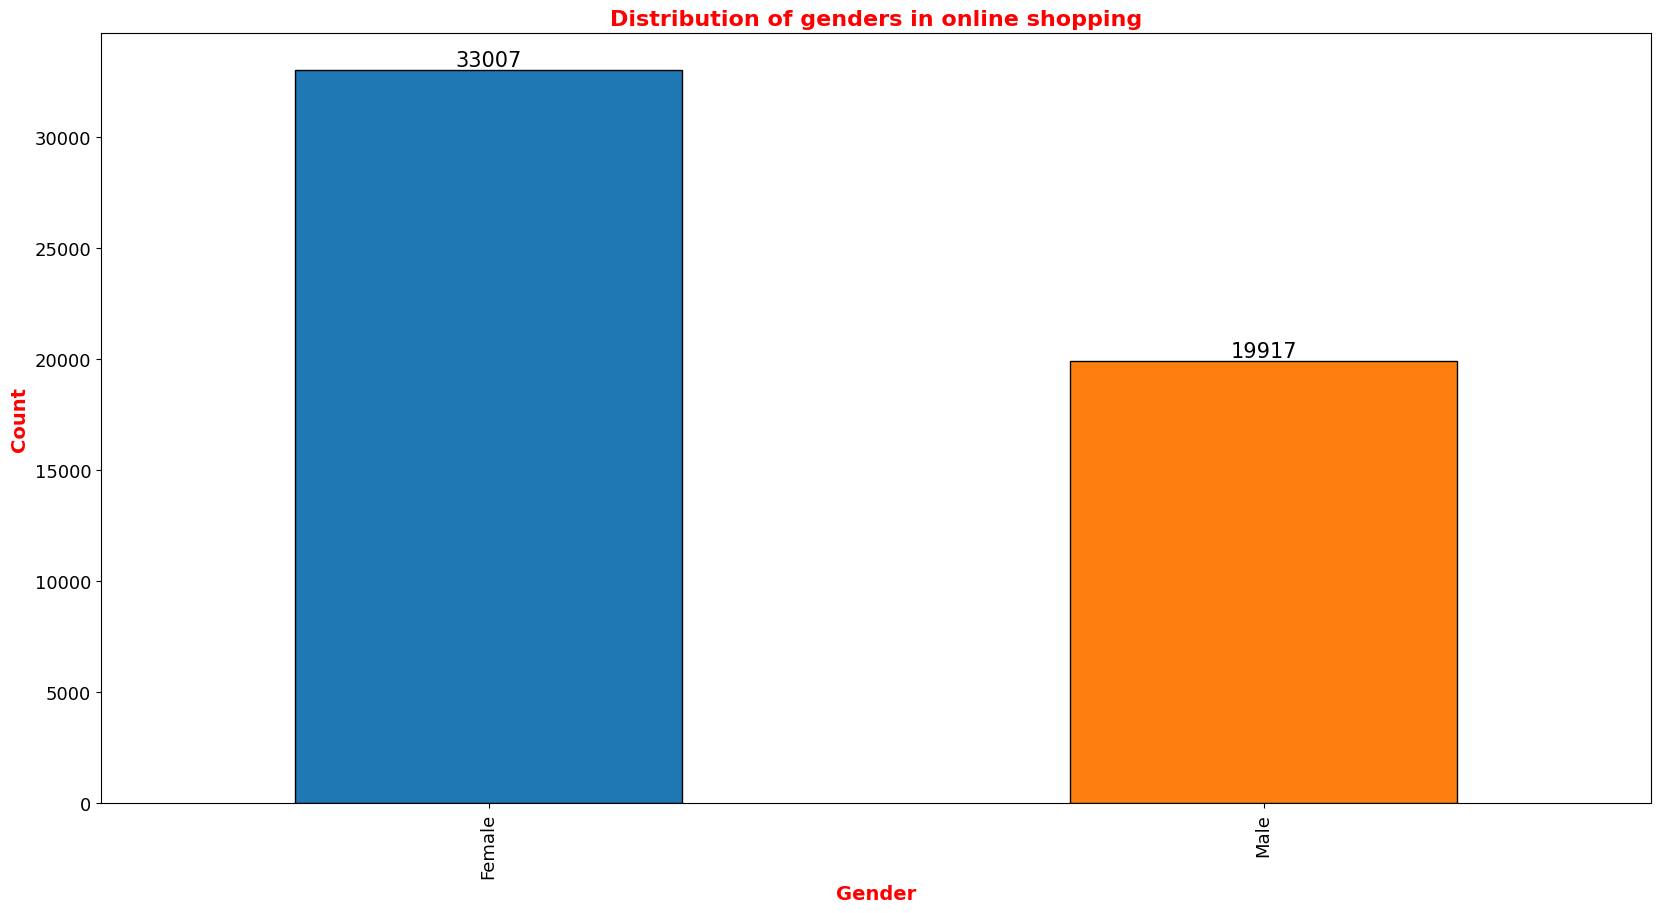

In [52]:
plt.figure(figsize=(20,10))

ax = df["Gender"].value_counts().plot(kind="bar",color=sns.color_palette("tab10"),edgecolor="black")
ax.set_xticklabels(["Female","Male"])

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va="bottom",ha="center",color="black",fontsize=15)
    ax.tick_params("both",labelsize=13)

plt.xlabel("Gender",weight="bold",color="#FF0000",fontsize=14)
plt.ylabel("Count",weight="bold",color="#FF0000",fontsize=14)
plt.title("Distribution of genders in online shopping",weight="bold",color="#FF0000",fontsize=16)
plt.show()

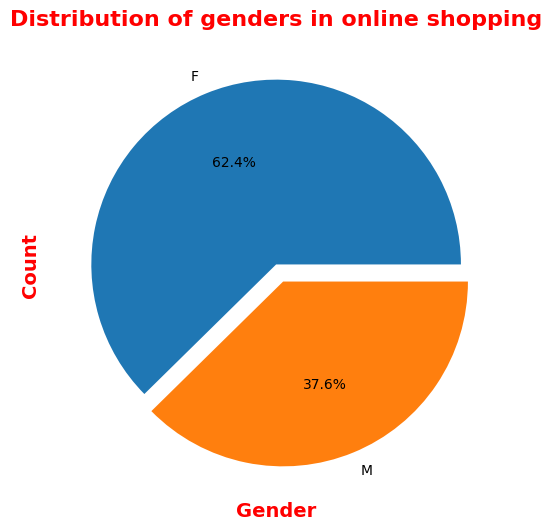

In [58]:
plt.figure(figsize=(10,6))

explode = (0,0.1)
df["Gender"].value_counts().plot(kind="pie",explode=explode,autopct="%1.1f%%")

plt.xlabel("Gender",weight="bold",color="#FF0000",fontsize=14)
plt.ylabel("Count",weight="bold",color="#FF0000",fontsize=14)
plt.title("Distribution of genders in online shopping",weight="bold",color="#FF0000",fontsize=16)
plt.show()

In [61]:
df["Location"].value_counts().sort_values(ascending=False)

Location
Chicago          18380
California       16136
New York         11173
New Jersey        4503
Washington DC     2732
Name: count, dtype: int64

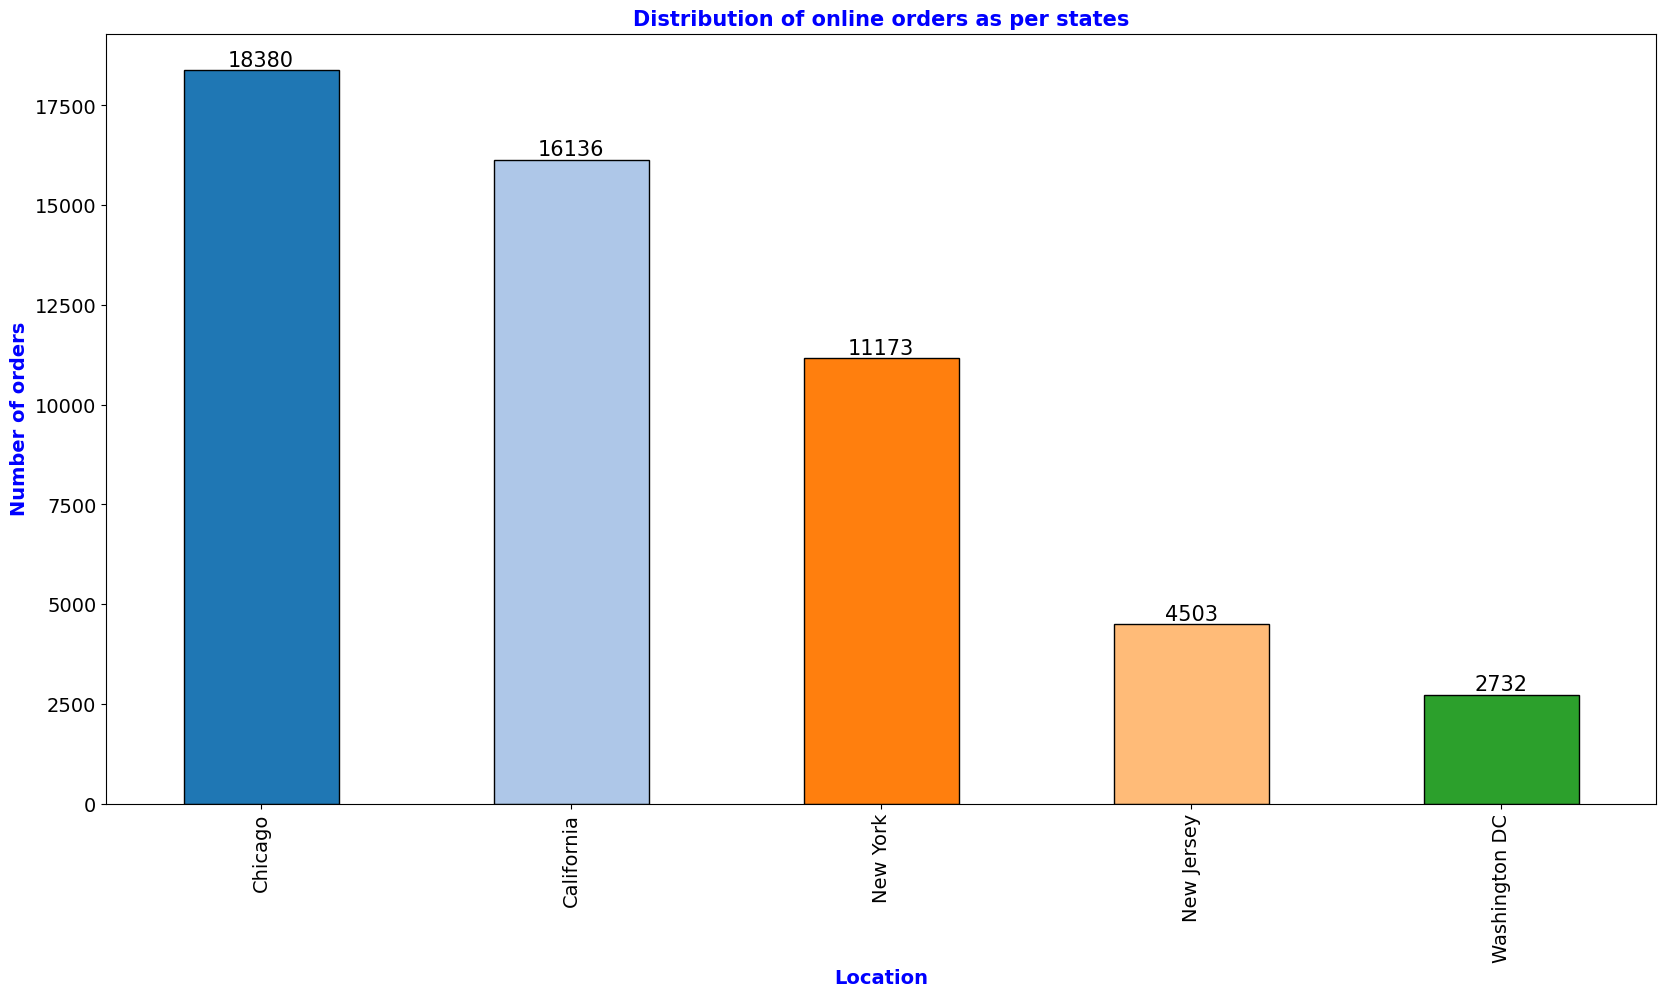

In [71]:
plt.figure(figsize=(20,10))

ax = df["Location"].value_counts().plot(kind="bar",color=sns.color_palette("tab20"),edgecolor="black")

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha="center",va="bottom",color="black",fontsize=15)
    ax.tick_params("both",labelsize=14)

plt.xlabel("Location",weight="bold",fontsize=14,color="#0000FF")
plt.ylabel("Number of orders",weight="bold",fontsize=14,color="#0000FF")
plt.title("Distribution of online orders as per states",weight="bold",fontsize=15,color="#0000FF")
plt.show()

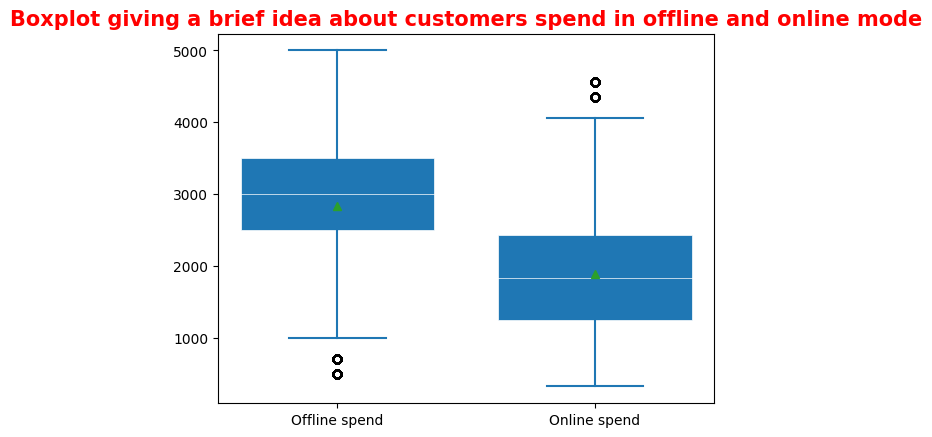

In [85]:
fig, ax = plt.subplots()

ax.boxplot((df["Offline_Spend"],df["Online_Spend"]),positions=[2,4],widths=1.5,patch_artist=True,
            showmeans=True,showfliers=True,
            medianprops={"color": "white", "linewidth": 0.5},
            boxprops={"facecolor": "C0", "edgecolor": "white",
                        "linewidth": 0.5},
            whiskerprops={"color": "C0", "linewidth": 1.5},
            capprops={"color": "C0", "linewidth": 1.5}   
        )
ax.set_xticklabels(["Offline spend","Online spend"])
plt.title("Boxplot giving a brief idea about customers spend in offline and online mode",weight="bold",fontsize=15,color="#FF0000")
plt.show()